In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 根据指定列读取csv文件
data = pd.read_csv('csv/DXYArea.csv')[[
    'cityName', 'city_confirmedCount', 'city_suspectedCount',
    'city_curedCount', 'city_deadCount', 'updateTime'
]]

data_copy = data.copy()

In [3]:
def get_data_by_cities(data, cities):
    # 删除非武汉的行
    data.drop(data[~data['cityName'].isin(cities)].index, inplace=True)

    # updateTime格式处理
    data['updateTime'] = data['updateTime'].map(lambda x: x[:10])

    data_cities = pd.DataFrame([])
    for city in cities:
        data_city = data.drop(data[data['cityName'] != city].index)

        data_city = data_city.groupby(['updateTime']).max()

        data_city['city_increase_confirmed'] = data_city[
            'city_confirmedCount'].diff(1).fillna(0)

        data_cities = data_cities.append(data_city)

    return data_cities

In [4]:
def show_bar_by_cities(data,cities,count_name):
    data_cities=get_data_by_cities(data,cities).pivot(columns='cityName').fillna(0)
    data_cities[count_name].plot(kind='bar',figsize=(15,5),width=0.8,rot=15)

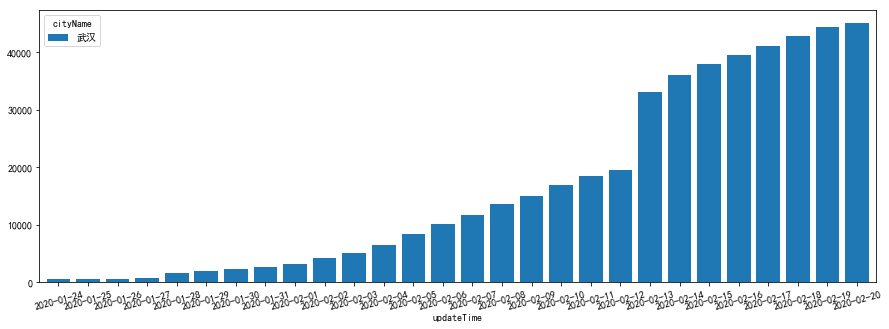

In [5]:
show_bar_by_cities(data.copy(),['武汉'],'city_confirmedCount')

# 轴旋转

In [6]:
data_cities = get_data_by_cities(data.copy(), ['黄石', '鄂州', '武汉'])

In [7]:
data_cities.pivot(columns='cityName').fillna(0)

city_confirmedCount                city_suspectedCount            \
cityName                    武汉      鄂州     黄石                  武汉   鄂州   黄石   
updateTime                                                                    
2020-01-24               495.0     0.0    0.0                 0.0  0.0  0.0   
2020-01-25               572.0     1.0   31.0                 0.0  0.0  0.0   
2020-01-26               618.0     1.0   31.0                 0.0  0.0  0.0   
2020-01-27               698.0    20.0   36.0                 0.0  0.0  0.0   
2020-01-28              1590.0    57.0   53.0                 0.0  0.0  0.0   
2020-01-29              1905.0    84.0   86.0                 0.0  0.0  0.0   
2020-01-30              2261.0   123.0  113.0                 0.0  0.0  0.0   
2020-01-31              2639.0   189.0  168.0                 0.0  0.0  0.0   
2020-02-01              3215.0   227.0  209.0                 0.0  0.0  0.0   
2020-02-02              4109.0   278.0  252.0                 0.0  0.0  0.0   
2020-02-03              5142.0   306.0  334.0                 0.0  0.0  0.0   
2020-02-04              6384.0   332.0  405.0                 0.0  0.0  0.0   
2020-02-05              8351.0   382.0  509.0                 0.0  0.0  0.0   
2020-02-06             10117.0   423.0  566.0                 0.0  0.0  0.0   
2020-02-07             11618.0   471.0  635.0                 0.0  0.0  0.0   
2020-02-08             13603.0   569.0  703.0                 0.0  0.0  0.0   
2020-02-09             14982.0   639.0  760.0                 0.0  0.0  0.0   
2020-02-10             16902.0   725.0  805.0                 0.0  0.0  0.0   
2020-02-11             18454.0   790.0  835.0                 0.0  0.0  0.0   
2020-02-12             19558.0   861.0  874.0                 0.0  0.0  0.0   
2020-02-13             32994.0  1065.0  911.0                 0.0  0.0  0.0   
2020-02-14             35991.0  1125.0  943.0                 0.0  0.0  0.0   
2020-02-15             37914.0  1192.0  980.0                 0.0  0.0  0.0   
2020-02-16             39462.0  1230.0  988.0                 0.0  0.0  0.0   
2020-02-17             41152.0  1274.0  988.0                 0.0  0.0  0.0   
2020-02-18             42752.0  1339.0  985.0                 0.0  0.0  0.0   
2020-02-19             44412.0  1343.0  985.0                 0.0  0.0  0.0   
2020-02-20             45027.0  1338.0  967.0                 0.0  0.0  0.0   

           city_curedCount               city_deadCount              \
cityName                武汉     鄂州     黄石             武汉    鄂州    黄石   
updateTime                                                            
2020-01-24            31.0    0.0    0.0           23.0   0.0   0.0   
2020-01-25            32.0    0.0    0.0           38.0   0.0   1.0   
2020-01-26            40.0    0.0    0.0           45.0   0.0   1.0   
2020-01-27            42.0    0.0    0.0           63.0   0.0   1.0   
2020-01-28            47.0    0.0    0.0           85.0   0.0   1.0   
2020-01-29            54.0    0.0    0.0          104.0   1.0   1.0   
2020-01-30            55.0    0.0    0.0          129.0   2.0   1.0   
2020-01-31           103.0    0.0    0.0          159.0   6.0   1.0   
2020-02-01           106.0    0.0    1.0          192.0   9.0   2.0   
2020-02-02           175.0    2.0    8.0          224.0  13.0   2.0   
2020-02-03           228.0    2.0    8.0          265.0  15.0   2.0   
2020-02-04           307.0    4.0    9.0          313.0  18.0   2.0   
2020-02-05           374.0    6.0   23.0          362.0  18.0   2.0   
2020-02-06           455.0    8.0   25.0          414.0  18.0   2.0   
2020-02-07           542.0    9.0   40.0          478.0  18.0   2.0   
2020-02-08           747.0   33.0   48.0          545.0  20.0   2.0   
2020-02-09           878.0   73.0   63.0          608.0  21.0   2.0   
2020-02-10          1046.0   48.0   67.0          681.0  24.0   3.0   
2020-02-11          1242.0   61.0   87.0          748.0  26.0   5.0   

In [8]:
result = data_cities.pivot(columns='cityName')['city_increase_confirmed']

In [9]:
result.columns

Index(['武汉', '鄂州', '黄石'], dtype='object', name='cityName')

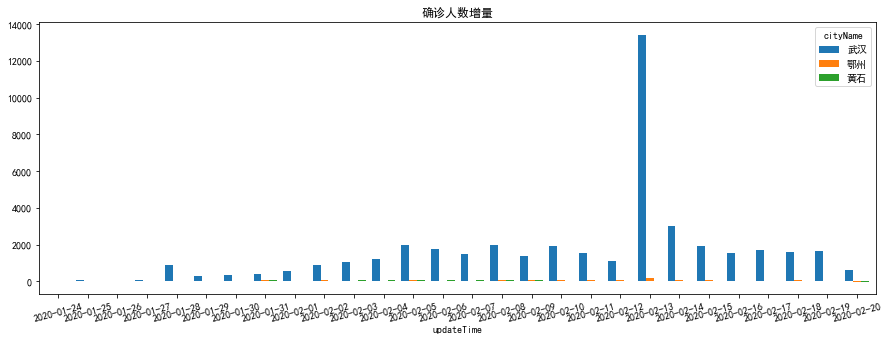

In [10]:
result.plot(kind='bar', figsize=(15, 5), title='确诊人数增量',width=0.8,rot=15)

# 使用列重建索引

In [11]:
z = data_cities.reset_index()

In [12]:
z.sort_values(['updateTime', 'cityName']).set_index(['updateTime', 'cityName'])

city_confirmedCount  city_suspectedCount  \
updateTime cityName                                             
2020-01-24 武汉                        495                    0   
2020-01-25 武汉                        572                    0   
           鄂州                          1                    0   
           黄石                         31                    0   
2020-01-26 武汉                        618                    0   
           鄂州                          1                    0   
           黄石                         31                    0   
2020-01-27 武汉                        698                    0   
           鄂州                         20                    0   
           黄石                         36                    0   
2020-01-28 武汉                       1590                    0   
           鄂州                         57                    0   
           黄石                         53                    0   
2020-01-29 武汉                       1905                    0   
           鄂州                         84                    0   
           黄石                         86                    0   
2020-01-30 武汉                       2261                    0   
           鄂州                        123                    0   
           黄石                        113                    0   
2020-01-31 武汉                       2639                    0   
           鄂州                        189                    0   
           黄石                        168                    0   
2020-02-01 武汉                       3215                    0   
           鄂州                        227                    0   
           黄石                        209                    0   
2020-02-02 武汉                       4109                    0   
           鄂州                        278                    0   
           黄石                        252                    0   
2020-02-03 武汉                       5142                    0   
           鄂州                        306                    0   
...                                  ...                  ...   
2020-02-11 武汉                      18454                    0   
           鄂州                        790                    0   
           黄石                        835                    0   
2020-02-12 武汉                      19558                    0   
           鄂州                        861                    0   
           黄石                        874                    0   
2020-02-13 武汉                      32994                    0   
           鄂州                       1065                    0   
           黄石                        911                    0   
2020-02-14 武汉                      35991                    0   
           鄂州                       1125                    0   
           黄石                        943                    0   
2020-02-15 武汉                      37914                    0   
           鄂州                       1192                    0   
           黄石                        980                    0   
2020-02-16 武汉                      39462                    0   
           鄂州                       1230                    0   
           黄石                        988                    0   
2020-02-17 武汉                      41152                    0   
           鄂州                       1274                    0   
           黄石                        988                    0   
2020-02-18 武汉                      42752                    0   
           鄂州                       1339                    0   
           黄石                        985                    0   
2020-02-19 武汉                      44412                    0   
           鄂州                       1343                    0   
           黄石                        985                    0   
2020-02-20 武汉                      45027                    0   
           鄂州                       1338                

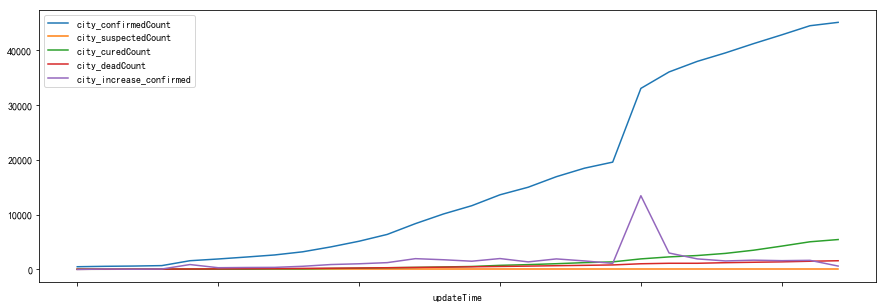

In [13]:
get_data_by_cities(data.copy(),['武汉']).plot(figsize=(15,5))

In [14]:
get_data_by_cities(data.copy(),['武汉'])

,cityName,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,city_increase_confirmed
updateTime,,,,,,
2020-01-24,武汉,495,0,31,23,0.0
2020-01-25,武汉,572,0,32,38,77.0
2020-01-26,武汉,618,0,40,45,46.0
2020-01-27,武汉,698,0,42,63,80.0
2020-01-28,武汉,1590,0,47,85,892.0
2020-01-29,武汉,1905,0,54,104,315.0
2020-01-30,武汉,2261,0,55,129,356.0
2020-01-31,武汉,2639,0,103,159,378.0
2020-02-01,武汉,3215,0,106,192,576.0


In [15]:
get_data_by_cities(data.copy(),['黄石'])

,cityName,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,city_increase_confirmed
updateTime,,,,,,
2020-01-25,黄石,31,0,0,1,0.0
2020-01-26,黄石,31,0,0,1,0.0
2020-01-27,黄石,36,0,0,1,5.0
2020-01-28,黄石,53,0,0,1,17.0
2020-01-29,黄石,86,0,0,1,33.0
2020-01-30,黄石,113,0,0,1,27.0
2020-01-31,黄石,168,0,0,1,55.0
2020-02-01,黄石,209,0,1,2,41.0
2020-02-02,黄石,252,0,8,2,43.0


In [16]:
data

,cityName,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime
0,晋中,36,0,18,0,2020-02-20 07:49:09.450
1,太原,19,0,10,0,2020-02-20 07:49:09.450
2,晋城,10,0,3,0,2020-02-20 07:49:09.450
3,长治,8,0,1,0,2020-02-20 07:49:09.450
4,大同,12,0,6,0,2020-02-20 07:49:09.450
5,运城,19,0,14,0,2020-02-20 07:49:09.450
6,朔州,8,0,3,0,2020-02-20 07:49:09.450
7,忻州,7,0,4,0,2020-02-20 07:49:09.450
8,阳泉,4,0,2,0,2020-02-20 07:49:09.450
9,临汾,2,0,1,0,2020-02-20 07:49:09.450
